In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_rose=pd.read_csv("F:\\Rose (1).csv")

In [3]:
df_rose

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [4]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
df_rose.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [6]:
df_rose.dropna(inplace=True)

In [7]:
df_rose.isna().sum()

YearMonth    0
Rose         0
dtype: int64

In [8]:
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'])

In [9]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  185 non-null    datetime64[ns]
 1   Rose       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


In [10]:
df_rose.set_index('YearMonth',inplace=True)

In [11]:
df_rose

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


<AxesSubplot:xlabel='YearMonth'>

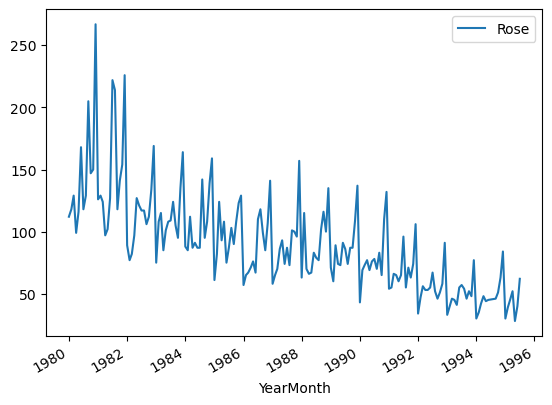

In [12]:
df_rose.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def test_adfuller(sales):
    result  = adfuller(sales)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1]<=0.05:
        print('data is stationary')
    else:
        print('data is not stationary')

In [15]:
test_adfuller(df_rose)

ADF statistics: -1.8380327966021965
p-value: 0.3617495457657554
data is not stationary


In [16]:
df_rose['rose difference'] = df_rose['Rose']-df_rose['Rose'].shift(1)

In [17]:
test_adfuller(df_rose['rose difference'].dropna())

ADF statistics: -8.167161332563701
p-value: 8.819857658212933e-13
data is stationary


In [18]:
df_rose

,Rose,rose difference
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,6.0
1980-03-01,129.0,11.0
1980-04-01,99.0,-30.0
1980-05-01,116.0,17.0
...,...,...
1995-03-01,45.0,6.0
1995-04-01,52.0,7.0
1995-05-01,28.0,-24.0


<AxesSubplot:xlabel='YearMonth'>

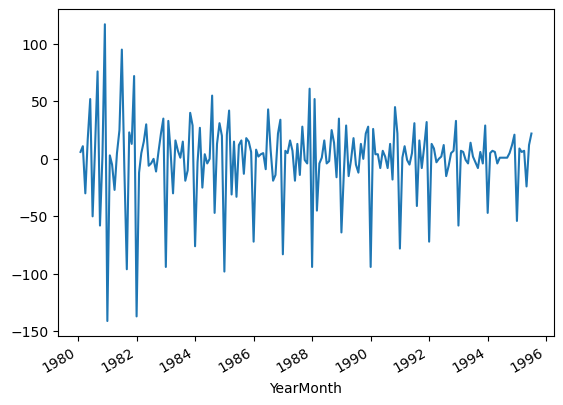

In [19]:
df_rose['rose difference'].plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

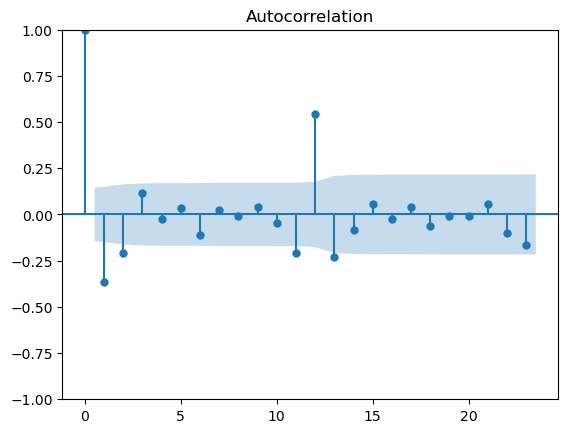

In [21]:
acf = plot_acf(df_rose['rose difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


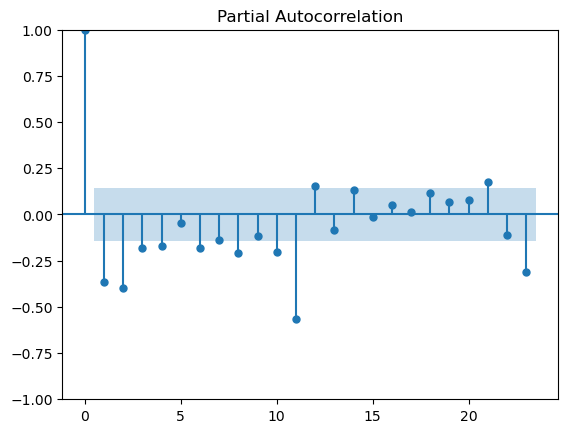

In [22]:
pacf = plot_pacf(df_rose['rose difference'].dropna())

# Split Data

In [23]:
from datetime import datetime,timedelta

In [24]:
train_dataset_end=datetime(1990,12,1)
test_dataset_end=datetime(1995,3,1)

In [25]:
df_rose

,Rose,rose difference
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,6.0
1980-03-01,129.0,11.0
1980-04-01,99.0,-30.0
1980-05-01,116.0,17.0
...,...,...
1995-03-01,45.0,6.0
1995-04-01,52.0,7.0
1995-05-01,28.0,-24.0


In [26]:
train_data=df_rose[:train_dataset_end]
test_data=df_rose[train_dataset_end+timedelta(days=1):test_dataset_end]

In [83]:
train_data

,Rose,rose difference
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,6.0
1980-03-01,129.0,11.0
1980-04-01,99.0,-30.0
1980-05-01,116.0,17.0
...,...,...
1990-08-01,70.0,-8.0
1990-09-01,83.0,13.0
1990-10-01,65.0,-18.0


In [84]:
test_data

,Rose,rose difference,Predicted_ARIMA,Predicted_SARIMA
YearMonth,,,,
1991-01-01,54.0,-78.0,-36.893584,-91.183796
1991-02-01,55.0,1.0,30.540893,7.118906
1991-03-01,66.0,11.0,27.306362,9.312434
1991-04-01,65.0,-1.0,8.745835,-2.437362
1991-05-01,60.0,-5.0,-11.783770,-0.140594
1991-06-01,65.0,5.0,6.843150,8.809749
1991-07-01,96.0,31.0,-6.950591,7.972127
1991-08-01,55.0,-41.0,-12.935630,-16.941520
1991-09-01,71.0,16.0,-0.231140,15.178974


In [38]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [28]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [61]:
model_ARIMA=ARIMA(df_rose['rose difference'],order=(4,1,2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [62]:
model_Arima_fit=model_ARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rose difference   No. Observations:                  185
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -889.664
Date:                Sun, 30 Jul 2023   AIC                           1793.328
Time:                        20:12:46   BIC                           1815.832
Sample:                             0   HQIC                          1802.449
                                - 185                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5259      0.069    -22.034      0.000      -1.662      -1.390
ar.L2         -1.0038      0.107     -9.392      0.000      -1.213      -0.794
ar.L3         -0.6031      0.114     -5.274      0.000      -0.827      -0.379
ar.L4         -0.1252      0.068     -1.842      0.065      -0.258       0.008
ma.L1         -0.0014      0.557     -0.002      0.998      -1.094       1.091
ma.L2         -0.9986      0.088    -11.341      0.000      -1.171      -0.826
sigma2       854.5393      0.001   1.28e+06      0.000     854.538     854.541
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                14.34
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.32e+21. Standard errors may be unstable.
"""

In [64]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1991-01-01 00:00:00
1995-03-01 00:00:00


In [65]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['rose difference']-pred

In [66]:
test_data['Predicted_ARIMA']=pred

C:\Users\Nitin Rathore\AppData\Local\Temp\ipykernel_5568\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='YearMonth'>

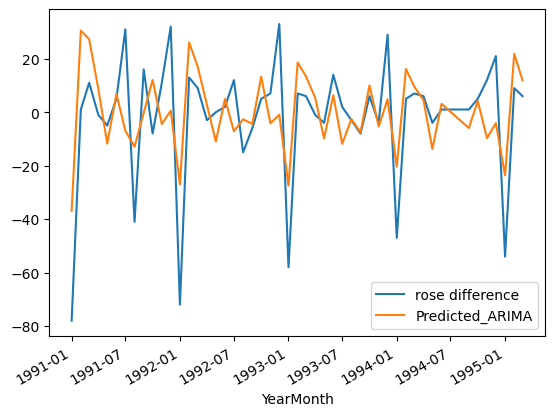

In [67]:
test_data[['rose difference','Predicted_ARIMA']].plot()

In [68]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
model_SARIMA=SARIMAX(df_rose['rose difference'],order=(4,1,2),seasonal_order=(4,1,2,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    rose difference   No. Observations:                  185
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -768.600
Date:                            Sun, 30 Jul 2023   AIC                           1563.201
Time:                                    20:19:33   BIC                           1604.118
Sample:                                         0   HQIC                          1579.802
                                            - 185                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1339      0.124      1.082      0.279      -0.109       0.376
ar.L2         -0.2817      0.097     -2.911      0.004      -0.471      -0.092
ar.L3          0.0620      0.108      0.575      0.566      -0.150       0.274
ar.L4         -0.0921      0.100     -0.921      0.357      -0.288       0.104
ma.L1         -1.8217      0.113    -16.129      0.000      -2.043      -1.600
ma.L2          0.8261      0.110      7.501      0.000       0.610       1.042
ar.S.L12      -0.9425      0.721     -1.308      0.191      -2.355       0.470
ar.S.L24       0.0854      0.418      0.205      0.838      -0.733       0.904
ar.S.L36       0.0189      0.305      0.062      0.950      -0.579       0.617
ar.S.L48      -0.0792      0.141     -0.562      0.574      -0.356       0.197
ma.S.L12       0.2270      0.765      0.297      0.767      -1.272       1.726
ma.S.L24      -0.6850      0.665     -1.029      0.303      -1.989       0.619
sigma2       370.2105     49.601      7.464      0.000     272.995     467.426
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               107.30
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1991-01-01 00:00:00
1995-03-01 00:00:00


In [75]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1991,1,1),end=datetime(1995,3,1))
residuals=test_data['rose difference']-pred_Sarima

In [76]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Nitin Rathore\AppData\Local\Temp\ipykernel_5568\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='YearMonth'>

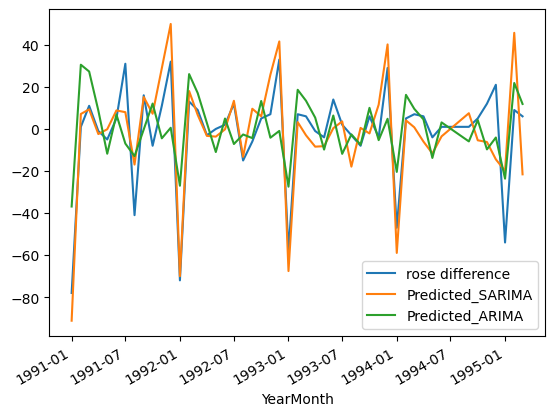

In [77]:
test_data[['rose difference','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [78]:
# Compute the root mean square error
test_data[['rose difference','Predicted_SARIMA','Predicted_ARIMA']].mean()

rose difference    -1.775510
Predicted_SARIMA   -1.697834
Predicted_ARIMA     0.156053
dtype: float64

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
rmse = sqrt(mean_squared_error(pred,test_data['rose difference']))
print(rmse)

18.432381053752028


In [81]:
rmse = sqrt(mean_squared_error(pred,test_data['Predicted_SARIMA']))
print(rmse)

21.330329127087015


In [82]:
rmse = sqrt(mean_squared_error(pred,test_data['Predicted_ARIMA']))
print(rmse)

0.0
